In [1]:
pip install pandas numpy statsmodels matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.svm import SVR
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings('ignore')

In [142]:
Data = pd.read_csv('Oxford_Data.csv')
Data

,yyyy,mm,tmax,tmin,af,rain,sun
0,NaN,NaN,degC,degC,days,mm,hours
1,1853.0,1.0,8.4,2.7,4,62.8,---
2,1853.0,2.0,3.2,-1.8,19,29.3,---
3,1853.0,3.0,7.7,-0.6,20,25.9,---
4,1853.0,4.0,12.6,4.5,0,60.1,---
...,...,...,...,...,...,...,...
2043,2023.0,3.0,10.6,4.5,3 1,4.9,65.9 Provisional
2044,2023.0,4.0,13.7,5.1,1,65.9,154.7 Provisional
2045,2023.0,5.0,18.3,* 8.4,0,51.2,221.5 Provisional
2046,2023.0,6.0,23.8,12.1,0,40.5,226.1 Provisional


In [143]:
# Remove columns sun'
columns_to_remove = ['sun']
Data = Data.drop(columns=columns_to_remove)

In [144]:
Data.dtypes    

yyyy    float64
mm      float64
tmax     object
tmin     object
af       object
rain     object
dtype: object

In [145]:
Data['yyyy'] = pd.to_numeric(Data['yyyy'], errors='coerce').astype('Int64')
Data['mm'] = pd.to_numeric(Data['mm'], errors='coerce').astype('Int64')
Data['tmax'] = pd.to_numeric(Data['tmax'], errors='coerce')
Data['tmin'] = pd.to_numeric(Data['tmin'], errors='coerce')
Data['af'] = pd.to_numeric(Data['af'], errors='coerce')
Data['rain'] = pd.to_numeric(Data['rain'], errors='coerce')    
Data.dtypes

yyyy      Int64
mm        Int64
tmax    float64
tmin    float64
af      float64
rain    float64
dtype: object

In [146]:
Data = Data.drop(index = Data.index[0])

In [147]:
Data.apply(pd.isnull).sum() # missing values

yyyy      0
mm        0
tmax      0
tmin     12
af      183
rain      0
dtype: int64

In [148]:
Data['tavg'] = (Data['tmax']+Data['tmin'])/2
Data

,yyyy,mm,tmax,tmin,af,rain,tavg
1,1853,1,8.4,2.7,4.0,62.8,5.55
2,1853,2,3.2,-1.8,19.0,29.3,0.70
3,1853,3,7.7,-0.6,20.0,25.9,3.55
4,1853,4,12.6,4.5,0.0,60.1,8.55
5,1853,5,16.8,6.1,0.0,59.5,11.45
...,...,...,...,...,...,...,...
2043,2023,3,10.6,4.5,NaN,4.9,7.55
2044,2023,4,13.7,5.1,1.0,65.9,9.40
2045,2023,5,18.3,NaN,0.0,51.2,NaN
2046,2023,6,23.8,12.1,0.0,40.5,17.95


# EDA

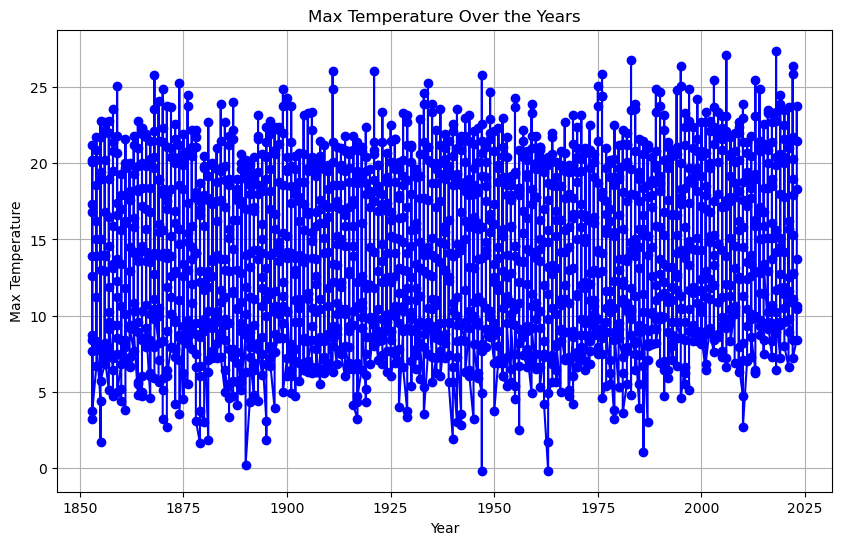

In [121]:
# Assuming you have a DataFrame named 'Data' with the 'yyyy' and 'tmax' columns
plt.figure(figsize=(10, 6))
plt.plot(Data['yyyy'], Data['tmax'], marker='o', linestyle='-', color='blue')
plt.xlabel('Year')
plt.ylabel('Max Temperature')
plt.title('Max Temperature Over the Years')
plt.grid(True)

plt.show()

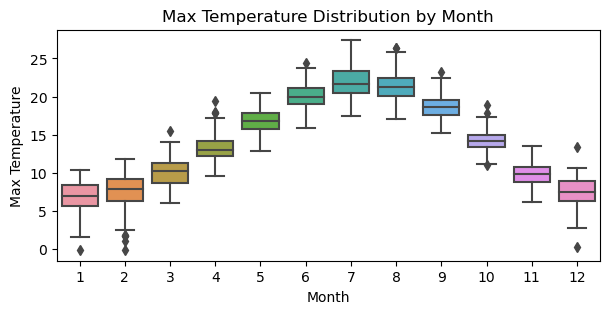

In [122]:
# Box plot
fig, ax = plt.subplots(figsize=(7, 3))
box_plot_Df = sns.boxplot(x=Data['mm'], y=Data['tmax'], ax=ax)

# Label the axes and add title
ax.set_xlabel('Month')
ax.set_ylabel('Max Temperature')
ax.set_title('Max Temperature Distribution by Month')

plt.show()

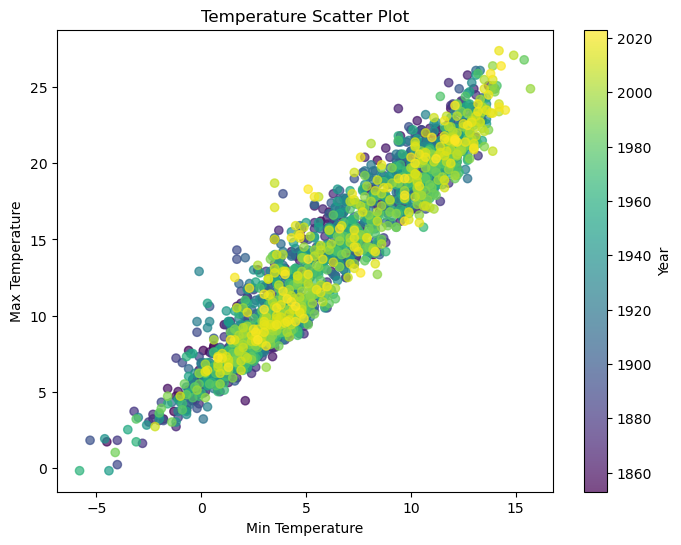

In [123]:
plt.figure(figsize=(8, 6))

# Create a scatter plot with color based on 'yyyy' using a colormap
plt.scatter(Data['tmin'], Data['tmax'], c=Data['yyyy'], cmap='viridis', alpha=0.7)

# Add colorbar
plt.colorbar(label='Year')

plt.xlabel('Min Temperature')
plt.ylabel('Max Temperature')
plt.title('Temperature Scatter Plot')
plt.show()

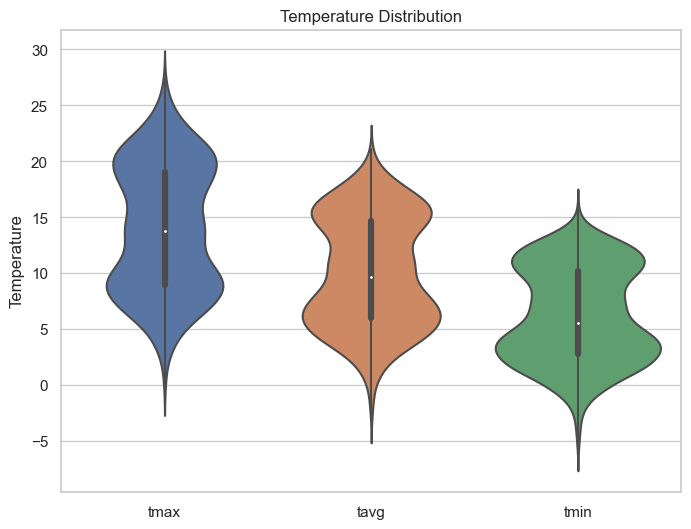

In [131]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a violin plot of temperature distribution
plt.figure(figsize=(8, 6))

sns.violinplot(data=Data[['tmax', 'tavg', 'tmin']])
plt.ylabel('Temperature')
plt.title('Temperature Distribution')

plt.show()

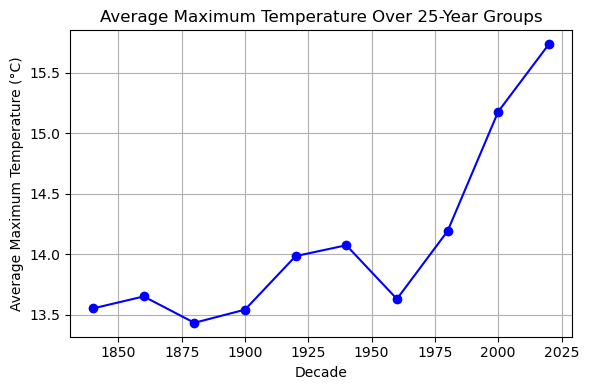

In [130]:
Data['decade'] = (Data['yyyy'] // 20) * 20
mean_max_temps = Data.groupby('decade')['tmax'].mean()

# Create a line graph
plt.figure(figsize=(6, 4))
plt.plot(mean_max_temps.index, mean_max_temps.values, marker='o', linestyle='-', color='b')
plt.title('Average Maximum Temperature Over 25-Year Groups')
plt.xlabel('Decade')
plt.ylabel('Average Maximum Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [149]:
Data["tmin"].fillna( method ='ffill', inplace = True)
Data["af"].fillna( method ='ffill', inplace = True)
Data["tavg"].fillna( method ='ffill', inplace = True)
Data.apply(pd.isnull).sum() # missing values

yyyy    0
mm      0
tmax    0
tmin    0
af      0
rain    0
tavg    0
dtype: int64

In [150]:
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047 entries, 1 to 2047
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yyyy    2047 non-null   Int64  
 1   mm      2047 non-null   Int64  
 2   tmax    2047 non-null   float64
 3   tmin    2047 non-null   float64
 4   af      2047 non-null   float64
 5   rain    2047 non-null   float64
 6   tavg    2047 non-null   float64
dtypes: Int64(2), float64(5)
memory usage: 116.1 KB
None


In [151]:
print(Data.describe())

              yyyy           mm         tmax         tmin           af  \
count  2047.000000  2047.000000  2047.000000  2047.000000  2047.000000   
mean   1937.792379     6.491451    13.981583     6.230093     3.763068   
std      49.255586     3.452060     5.700771     4.213745     5.353217   
min    1853.000000     1.000000    -0.200000    -5.800000     0.000000   
25%    1895.000000     3.000000     9.000000     2.800000     0.000000   
50%    1938.000000     6.000000    13.800000     5.600000     1.000000   
75%    1980.000000     9.000000    19.100000    10.200000     6.000000   
max    2023.000000    12.000000    27.400000    15.700000    28.000000   

              rain         tavg  
count  2047.000000  2047.000000  
mean     46.154763    10.102296  
std      24.957228     4.909663  
min       0.000000    -3.000000  
25%      26.100000     6.000000  
50%      44.200000     9.700000  
75%      64.250000    14.650000  
max      99.900000    21.100000  


# split data

In [153]:
X = Data.drop(columns=['tmax','yyyy','mm'])
y = Data['tmax']

In [154]:
print("Feature Variables (X):")
print(X.head())

Feature Variables (X):
   tmin    af  rain   tavg
1   2.7   4.0  62.8   5.55
2  -1.8  19.0  29.3   0.70
3  -0.6  20.0  25.9   3.55
4   4.5   0.0  60.1   8.55
5   6.1   0.0  59.5  11.45


In [155]:
y.head()

1     8.4
2     3.2
3     7.7
4    12.6
5    16.8
Name: tmax, dtype: float64

In [156]:
# Define the splitting condition 
split_condition = 2000

# Select the rows where the 'yyyy' column meets the condition for training
X_train = X[Data['yyyy'] <= split_condition]
y_train = y[Data['yyyy']<= split_condition]

# For test data, select the rows where the 'yyyy' column is greater than 2000
X_test = X[Data['yyyy'] > split_condition]
y_test = y[Data['yyyy']> split_condition]

In [139]:
# Print sample data from both sets
print("Train Data:")
print(X_train)

print("\nTest Data:")
print(X_test)

Train Data:
      tmin    af  rain   tavg  decade
1      2.7   4.0  62.8   5.55    1840
2     -1.8  19.0  29.3   0.70    1840
3     -0.6  20.0  25.9   3.55    1840
4      4.5   0.0  60.1   8.55    1840
5      6.1   0.0  59.5  11.45    1840
...    ...   ...   ...    ...     ...
1772  13.3   0.0  58.3  18.00    2000
1773  12.1   0.0  87.2  15.65    2000
1774   8.2   0.0  19.5  11.25    2000
1775   4.8   0.0  99.1   7.70    2000
1776   4.2   7.0  99.8   6.40    2000

[1776 rows x 5 columns]

Test Data:
      tmin    af  rain   tavg  decade
1777   1.2  13.0  57.4   3.80    2000
1778   2.0  10.0  68.6   5.40    2000
1779   3.1   5.0  75.1   6.05    2000
1780   4.8   0.0  72.7   8.85    2000
1781   7.9   0.0  35.5  13.20    2000
...    ...   ...   ...    ...     ...
2043   4.5   9.0   4.9   7.55    2020
2044   5.1   1.0  65.9   9.40    2020
2045   5.1   0.0  51.2   9.40    2020
2046  12.1   0.0  40.5  17.95    2020
2047  12.1   0.0  99.9  17.95    2020

[271 rows x 5 columns]


In [140]:
# Print the shapes of the resulting arrays
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1776, 5)
X_test shape: (271, 5)
y_train shape: (1776,)
y_test shape: (271,)


In [87]:
# Define the models
models = {
    'RF Regressor': RandomForestRegressor(),
    'Linear Regression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'GBoost Regressor': GradientBoostingRegressor(),
    'SVR': SVR(),
    'CatBoost Regressor': CatBoostRegressor(),
    'Lasso Regression': Lasso(),
}

# You can proceed with fitting and evaluating these models using your data

model_r2_score = {}  # Initialize an empty dictionary to store R-squared scores

for model_name, model in models.items():
    model.fit(X_train, y_train)
    model_r2_score[model_name] = model.score(X_test, y_test)

Learning rate set to 0.044832
0:	learn: 5.4649106	total: 31.6ms	remaining: 31.6s
1:	learn: 5.2497487	total: 33.6ms	remaining: 16.8s
2:	learn: 5.0456960	total: 35.2ms	remaining: 11.7s
3:	learn: 4.8399861	total: 36.6ms	remaining: 9.11s
4:	learn: 4.6535488	total: 37.9ms	remaining: 7.55s
5:	learn: 4.4749337	total: 39.6ms	remaining: 6.55s
6:	learn: 4.3111463	total: 41.2ms	remaining: 5.85s
7:	learn: 4.1507132	total: 42.6ms	remaining: 5.28s
8:	learn: 3.9946978	total: 44ms	remaining: 4.84s
9:	learn: 3.8425577	total: 45.4ms	remaining: 4.5s
10:	learn: 3.6872654	total: 46.8ms	remaining: 4.21s
11:	learn: 3.5395952	total: 48.1ms	remaining: 3.96s
12:	learn: 3.4090920	total: 49.4ms	remaining: 3.75s
13:	learn: 3.2893461	total: 50.7ms	remaining: 3.57s
14:	learn: 3.1692772	total: 52ms	remaining: 3.42s
15:	learn: 3.0504381	total: 53.5ms	remaining: 3.29s
16:	learn: 2.9451345	total: 54.9ms	remaining: 3.17s
17:	learn: 2.8357883	total: 56.4ms	remaining: 3.08s
18:	learn: 2.7328603	total: 58.5ms	remaining: 3.0

239:	learn: 0.4045616	total: 371ms	remaining: 1.18s
240:	learn: 0.4028275	total: 373ms	remaining: 1.17s
241:	learn: 0.4002515	total: 375ms	remaining: 1.17s
242:	learn: 0.3993472	total: 376ms	remaining: 1.17s
243:	learn: 0.3979626	total: 377ms	remaining: 1.17s
244:	learn: 0.3958656	total: 379ms	remaining: 1.17s
245:	learn: 0.3947547	total: 380ms	remaining: 1.16s
246:	learn: 0.3942930	total: 382ms	remaining: 1.16s
247:	learn: 0.3926745	total: 383ms	remaining: 1.16s
248:	learn: 0.3891554	total: 384ms	remaining: 1.16s
249:	learn: 0.3878379	total: 386ms	remaining: 1.16s
250:	learn: 0.3857271	total: 387ms	remaining: 1.16s
251:	learn: 0.3847765	total: 389ms	remaining: 1.15s
252:	learn: 0.3837866	total: 390ms	remaining: 1.15s
253:	learn: 0.3827410	total: 391ms	remaining: 1.15s
254:	learn: 0.3821498	total: 393ms	remaining: 1.15s
255:	learn: 0.3813982	total: 394ms	remaining: 1.15s
256:	learn: 0.3806062	total: 396ms	remaining: 1.14s
257:	learn: 0.3801347	total: 397ms	remaining: 1.14s
258:	learn: 

513:	learn: 0.1870836	total: 756ms	remaining: 715ms
514:	learn: 0.1869011	total: 757ms	remaining: 713ms
515:	learn: 0.1866542	total: 759ms	remaining: 712ms
516:	learn: 0.1858539	total: 761ms	remaining: 711ms
517:	learn: 0.1849620	total: 762ms	remaining: 709ms
518:	learn: 0.1845126	total: 764ms	remaining: 708ms
519:	learn: 0.1835499	total: 765ms	remaining: 706ms
520:	learn: 0.1828298	total: 767ms	remaining: 705ms
521:	learn: 0.1825255	total: 768ms	remaining: 703ms
522:	learn: 0.1820625	total: 770ms	remaining: 702ms
523:	learn: 0.1819773	total: 771ms	remaining: 701ms
524:	learn: 0.1812965	total: 773ms	remaining: 699ms
525:	learn: 0.1807103	total: 775ms	remaining: 698ms
526:	learn: 0.1800843	total: 776ms	remaining: 697ms
527:	learn: 0.1794155	total: 778ms	remaining: 695ms
528:	learn: 0.1791120	total: 779ms	remaining: 694ms
529:	learn: 0.1788066	total: 781ms	remaining: 692ms
530:	learn: 0.1787322	total: 782ms	remaining: 691ms
531:	learn: 0.1782006	total: 783ms	remaining: 689ms
532:	learn: 

783:	learn: 0.1175390	total: 1.13s	remaining: 310ms
784:	learn: 0.1172346	total: 1.13s	remaining: 309ms
785:	learn: 0.1170007	total: 1.13s	remaining: 307ms
786:	learn: 0.1167209	total: 1.13s	remaining: 306ms
787:	learn: 0.1164901	total: 1.13s	remaining: 304ms
788:	learn: 0.1162258	total: 1.13s	remaining: 303ms
789:	learn: 0.1161460	total: 1.13s	remaining: 301ms
790:	learn: 0.1160665	total: 1.13s	remaining: 300ms
791:	learn: 0.1159470	total: 1.14s	remaining: 298ms
792:	learn: 0.1157390	total: 1.14s	remaining: 297ms
793:	learn: 0.1157004	total: 1.14s	remaining: 295ms
794:	learn: 0.1154487	total: 1.14s	remaining: 294ms
795:	learn: 0.1151500	total: 1.14s	remaining: 292ms
796:	learn: 0.1148548	total: 1.14s	remaining: 291ms
797:	learn: 0.1148211	total: 1.14s	remaining: 290ms
798:	learn: 0.1145987	total: 1.15s	remaining: 288ms
799:	learn: 0.1145089	total: 1.15s	remaining: 287ms
800:	learn: 0.1143482	total: 1.15s	remaining: 285ms
801:	learn: 0.1143150	total: 1.15s	remaining: 284ms
802:	learn: 

Note: you may need to restart the kernel to use updated packages.


In [86]:
model_comparison = pd.DataFrame({'model': model_r2_score.keys(), 'R-squared': model_r2_score.values()})
# print(model_comparison)
from tabulate import tabulate

# Assuming you have dictionaries 'model_r2_score' containing model names as keys and R-squared scores as values
model_r2_score = {'RF Regressor': 0.980267, 'Linear Regression': 0.982422, 'ElasticNet': 0.966579,
                  'GBoost Regressor': 0.976652, 'SVR': 0.952136, 'CatBoost Regressor': 0.980684,
                  'Lasso Regression': 0.966519}

# Creating a DataFrame
model_comparison = pd.DataFrame({'Model': list(model_r2_score.keys()), 'R-squared': list(model_r2_score.values())})

# Convert DataFrame to a tabulated format
table = tabulate(model_comparison, headers='keys', tablefmt='grid', showindex=False)

# Print the tabulated table
print(table)

+--------------------+-------------+
| Model              |   R-squared |
+====================+=============+
| RF Regressor       |    0.980267 |
+--------------------+-------------+
| Linear Regression  |    0.982422 |
+--------------------+-------------+
| ElasticNet         |    0.966579 |
+--------------------+-------------+
| GBoost Regressor   |    0.976652 |
+--------------------+-------------+
| SVR                |    0.952136 |
+--------------------+-------------+
| CatBoost Regressor |    0.980684 |
+--------------------+-------------+
| Lasso Regression   |    0.966519 |
+--------------------+-------------+


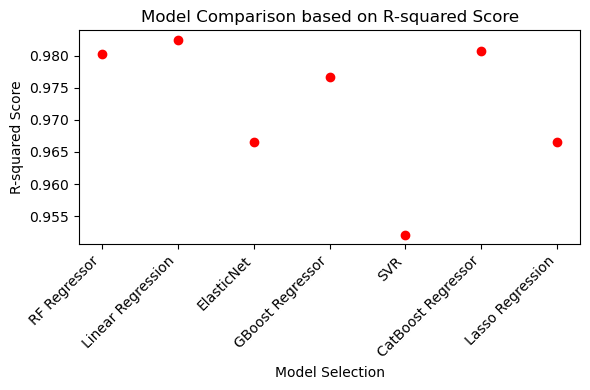

In [97]:
# Creating a DataFrame
model_comparison1 = pd.DataFrame({'Model': list(model_r2_score.keys()), 'R-squared': list(model_r2_score.values())})

# Sort the DataFrame by R-squared scores
model_comparison1 = model_comparison1.sort_values(by='R-squared', ascending=False)

# Create a scatter plot
plt.figure(figsize=(6,4))
plt.scatter(model_comparison['Model'], model_comparison['R-squared'], color='red')
plt.xlabel('Model Selection')
plt.ylabel('R-squared Score')
plt.title('Model Comparison based on R-squared Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


# Random Forest Regressor

In [104]:
import time
# Define the hyperparameter grid for random search
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestRegressor
rs_rf = RandomizedSearchCV(
    RandomForestRegressor(),
    param_distributions=rf_grid,
    cv=5,
    n_iter=20,
    verbose=True
)

# Measure execution time for RF model training
start_time_rf = time.time()
rs_rf.fit(X_train, y_train)
end_time_rf = time.time()
time_taken_rf = end_time_rf - start_time_rf
print(time_taken_rf)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
189.18654823303223


In [100]:
rs_rf.best_params_

{'n_estimators': 960,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': None}

In [101]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.9795690804933465

# LinearRegression

In [103]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid for random search
lr_grid = {
    "fit_intercept": [True, False],
    "normalize": [True, False],
    "copy_X": [True, False]
}

# Set random seed for reproducibility
np.random.seed(42)

# Setup random hyperparameter search for LinearRegression
rs_lr = RandomizedSearchCV(
    LinearRegression(),           # Create an instance of LinearRegression
    param_distributions=lr_grid,  # Use the defined hyperparameter grid
    cv=5,                         # Number of cross-validation folds
    n_iter=20,                    # Number of iterations in the search
    verbose=True                 # Print progress during search
)

# Measure execution time for LR model training
start_time_lr = time.time()
rs_lr.fit(X_train, y_train)
end_time_lr = time.time()
time_taken_lr = end_time_lr - start_time_lr
print(time_taken_lr)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.2695047855377197


In [105]:
# Evaluate the randomized search random forest model
rs_lr.best_params_

{'normalize': True, 'fit_intercept': False, 'copy_X': True}

In [106]:
# Evaluate the randomized search random forest model
rs_lr.score(X_test, y_test)

0.9824359766930927

# Best model = linear Regressor

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
best_lr_model = rs_lr.best_estimator_

# Predict using the best model
y_pred_best_lr_model = best_lr_model.predict(X_test)

# Calculate additional regression metrics
mae = mean_absolute_error(y_test, y_pred_best_lr_model)
mse = mean_squared_error(y_test, y_pred_best_lr_model)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_best_lr_model)

In [37]:
# Create a custom regression report
print("Regression Model Metrics:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Regression Model Metrics:
Mean Absolute Error: 0.13158423227097726
Mean Squared Error: 0.5574110075706619
Root Mean Squared Error: 0.7465996300365155
R-squared: 0.9824359766930927


In [43]:
y_pred = rs_lr.predict(X_test)
print(y_pred)

num_predictions = len(y_pred)
print("Number of Predictions:", num_predictions)

[ 6.3988132   8.79613781  8.99472711 12.89288001 18.49784114 20.70186986
 23.40137129 22.69773484 17.90225982 16.99831004 11.19810381  6.80156341
  9.19674009 11.09492968 12.39803813 15.19492903 16.79747522 20.00000358
 22.09692856 22.80133348 19.70137828 14.80126862 11.79971037  8.8936867
  7.59581179  8.40142817 13.29768155 15.29690493 17.4975571  22.39965625
 23.70151332 25.50538605 21.29819013 13.9970786  11.99368732  8.69569053
  8.79697888  8.70212597 10.89483001 14.69433814 17.99869154 21.80331087
 21.99790971 23.40469958 20.10337852 14.70156996 10.89971959  8.59850356
  9.39950818  7.30176701 11.19924879 14.29603327 17.19852871 21.59686785
 22.30412842 23.10213891 20.90230612 17.10161873  9.90048554  7.69869388
  7.20135057  6.59990159  9.19677659 13.89759409 17.60392998 23.10381823
 27.09864751 21.80171885 22.09913146 17.2044336  12.09442946  9.39742076
 10.39621305  9.69563159 11.9960434  17.79788377 17.49722932 20.49781818
 20.60605918 21.70201272 19.20280845 15.09671551 11.

In [48]:
result_df = pd.DataFrame({
    'yyyy': Data.loc[X_test.index, 'yyyy'],  # Get the 'yyyy' values corresponding to the test data
    'mm': Data.loc[X_test.index, 'mm'],      # Get the 'mm' values corresponding to the test data
    'tmax': y_test,                          # Original 'tmax' values from the test data
    'predicted_tmax': y_pred        # Predicted 'tmax' values
})

# Print the resulting DataFrame
print(result_df)

      yyyy  mm  tmax  predicted_tmax
1777  2001   1   6.4        6.398813
1778  2001   2   8.8        8.796138
1779  2001   3   9.0        8.994727
1780  2001   4  12.9       12.892880
1781  2001   5  18.5       18.497841
...    ...  ..   ...             ...
2043  2023   3  10.6       10.604457
2044  2023   4  13.7       13.693984
2045  2023   5  18.3       13.694894
2046  2023   6  23.8       23.800701
2047  2023   7  21.5       23.795100

[271 rows x 4 columns]


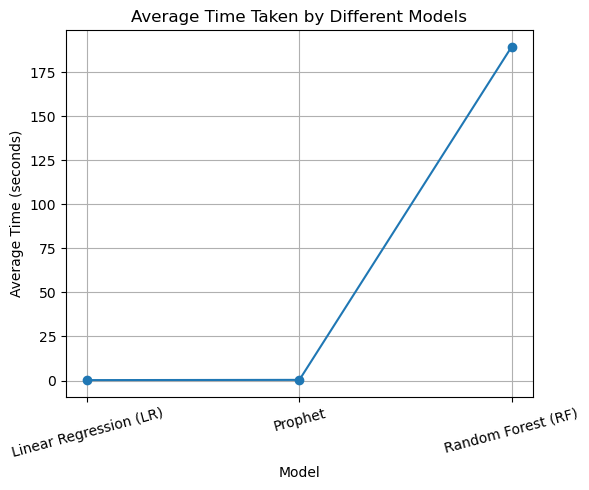

In [109]:
# Table data
models = ['Linear Regression (LR)', 'Prophet', 'Random Forest (RF)']
average_times = [0.2695, 0.3997, 189.1865]

# Create a line plot
plt.figure(figsize=(6,5))
plt.plot(models, average_times, marker='o')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Average Time (seconds)')
plt.title('Average Time Taken by Different Models')

# Rotate x-labels for better visibility
plt.xticks(rotation=15)

# Show plot
plt.tight_layout()
plt.grid(True)
plt.show()

# Visualize predicted vs. actual values

Scatter Plot of Predicted vs. Actual Values:
Show a scatter plot where the x-axis represents the actual values of the target variable ('tmax') and the y-axis represents the predicted values. Each point on the plot represents a data point from your test dataset. This visualization helps to visually assess how closely the predicted values match the actual values

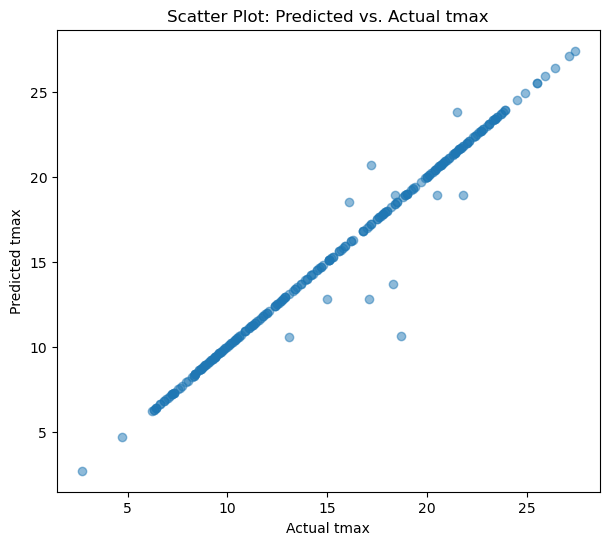

In [42]:
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_best_lr_model, alpha=0.5)
plt.xlabel('Actual tmax')
plt.ylabel('Predicted tmax')
plt.title('Scatter Plot: Predicted vs. Actual tmax')
plt.show()

Residual Plot:
A residual plot shows the differences between actual and predicted values on the y-axis against the actual values on the x-axis. This plot helps you identify patterns in the model's errors. If the points in the plot are randomly scattered around the horizontal line, your model's predictions are well-distributed.

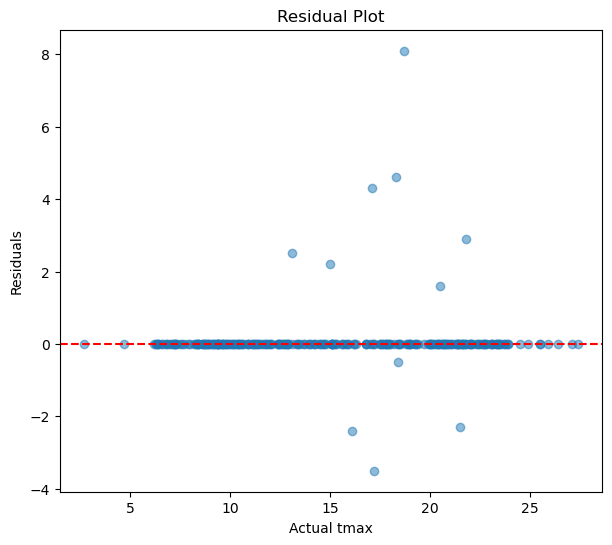

In [43]:
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_test - y_pred_best_lr_model, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual tmax')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Distribution of Residuals:
Visualize the distribution of the residuals using a histogram or a kernel density plot. This helps you understand the distribution of prediction errors and whether they are normally distributed.

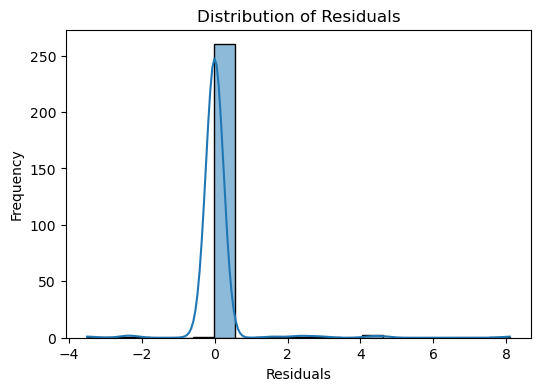

In [46]:
plt.figure(figsize=(6, 4))
sns.histplot(y_test - y_pred_best_lr_model, bins=20, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

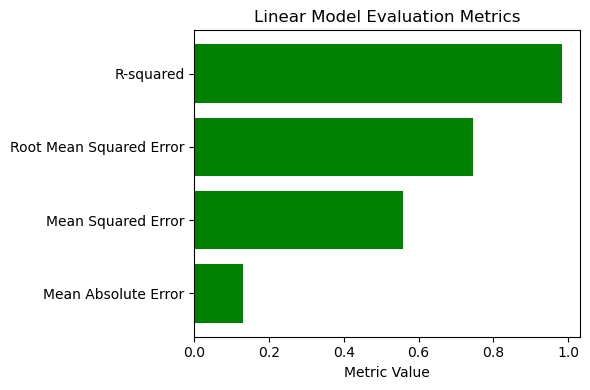

In [81]:
# Metrics visualization
plt.figure(figsize=(6,4))
metrics_labels = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R-squared']
metrics_values = [mae, mse, rmse, r2]
plt.barh(metrics_labels, metrics_values, color='g')
plt.xlabel('Metric Value')
plt.title('Linear Model Evaluation Metrics')

plt.tight_layout()
plt.show()

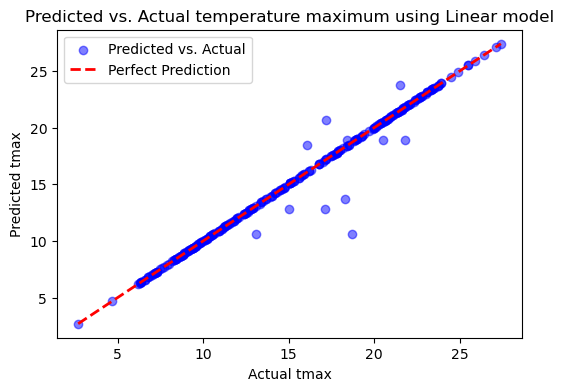

In [80]:
# Scatter plot of predicted vs. actual values
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_best_lr_model, alpha=0.5, color='b', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual tmax')
plt.ylabel('Predicted tmax')
plt.title('Predicted vs. Actual temperature maximum using Linear model')
plt.legend()
plt.show()

In [68]:
rf1_model = rs_rf.best_estimator_

# Predict using the best model
y_pred_rf_model = rf1_model.predict(X_test)

# Calculate additional regression metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf_model)
mse_rf = mean_squared_error(y_test, y_pred_rf_model)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf_model)# Create a custom regression report
print("Regression Model Metrics:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)
print("R-squared:", r2_rf)

Regression Model Metrics:
Mean Absolute Error: 0.3345261580379156
Mean Squared Error: 0.6692694275453067
Root Mean Squared Error: 0.8180888873131738
R-squared: 0.9789113173863612


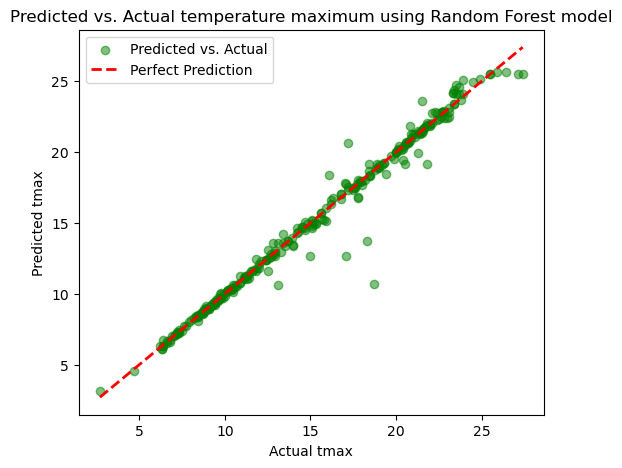

In [75]:
# Scatter plot of predicted vs. actual values
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_rf_model, alpha=0.5, color='g', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual tmax')
plt.ylabel('Predicted tmax')
plt.title('Predicted vs. Actual temperature maximum using Random Forest model')
plt.legend()
plt.show()

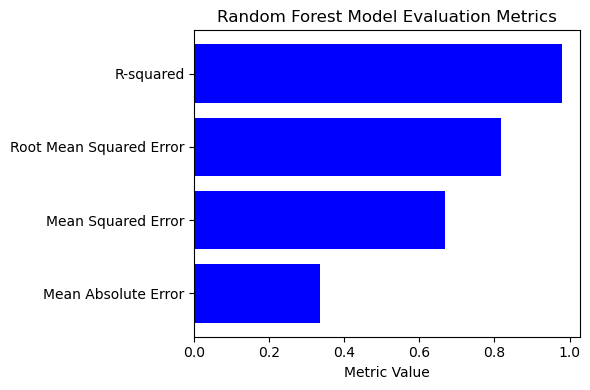

In [76]:

# Metrics visualization
plt.figure(figsize=(6,4))
metrics_labels = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R-squared']
metrics_values = [mae_rf, mse_rf, rmse_rf, r2_rf]
plt.barh(metrics_labels, metrics_values, color='b')
plt.xlabel('Metric Value')
plt.title('Random Forest Model Evaluation Metrics')

plt.tight_layout()
plt.show()

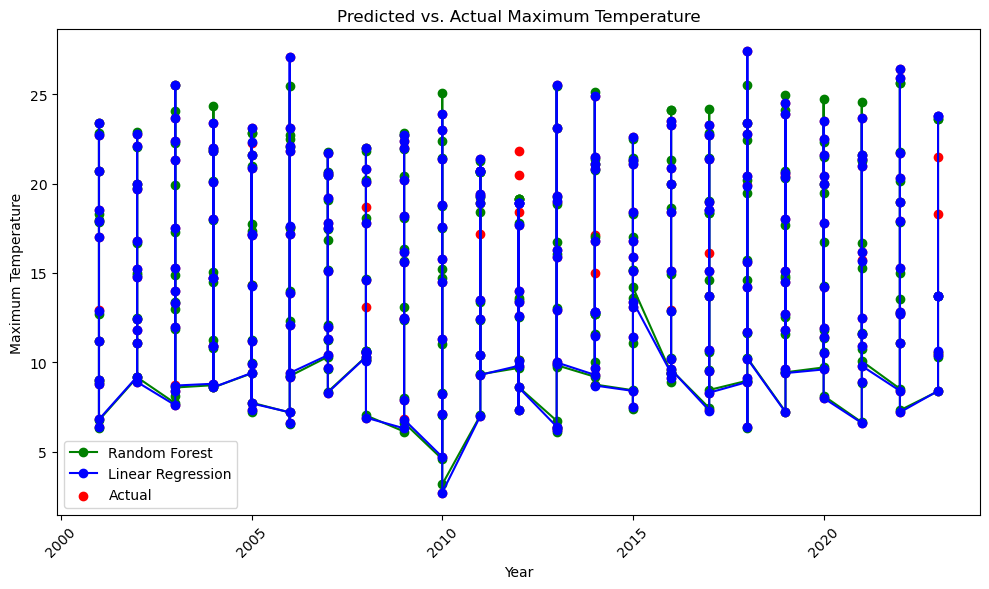

In [85]:
# Get the years from the test data
years = Data.loc[X_test.index, 'yyyy']

# Plotting the predicted values for Random Forest and Linear Regression models
plt.figure(figsize=(10, 6))
plt.plot(years, y_pred_rf_model, marker='o', linestyle='-', color='g', label='Random Forest')
plt.plot(years, y_pred_best_lr_model, marker='o', linestyle='-', color='b', label='Linear Regression')
plt.scatter(years, y_test, color='r', label='Actual')
plt.xlabel('Year')
plt.ylabel('Maximum Temperature')
plt.title('Predicted vs. Actual Maximum Temperature')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()